# 20NAI0005_Abhishek_Kumar

# 1. Load all the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Loading and Exploration

In [2]:
# Input data files are available in the "input" directory.

import os
print(os.listdir("input"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
df_train = pd.read_csv('input/train.csv')
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

In [4]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
# Normalize inputs
X_train = X_train / 255.0

In [8]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

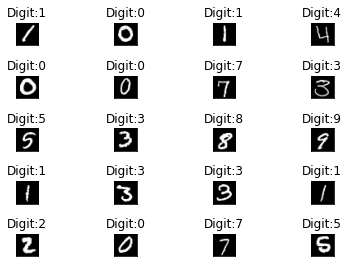

In [9]:
plot_digits(X_train, Y_train)


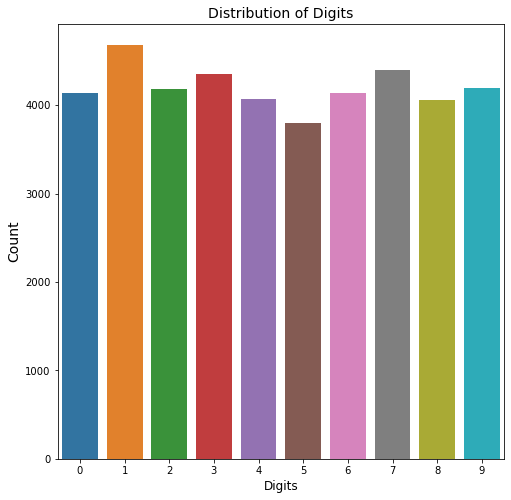

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(Y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

# 3. Preparing data for training 

In [11]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [12]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

# 4. The model contains following things : (Note : use any grayscale dataset with the 10 classes)

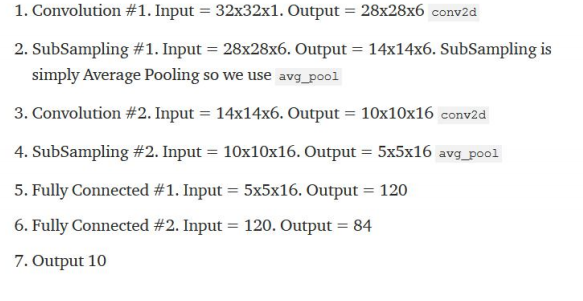

In [13]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(12, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 12)                4812      
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [15]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [16]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [17]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [18]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=30, validation_data=(X_val, T_val), callbacks=[reduce_lr])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
408/407 [==============================] - 13s 32ms/step - loss: 1.0794 - accuracy: 0.6481 - val_loss: 0.3195 - val_accuracy: 0.9032
Epoch 2/30
408/407 [==============================] - 17s 42ms/step - loss: 0.4412 - accuracy: 0.8656 - val_loss: 0.2082 - val_accuracy: 0.9357
Epoch 3/30
408/407 [==============================] - 16s 39ms/step - loss: 0.3191 - accuracy: 0.9031 - val_loss: 0.1655 - val_accuracy: 0.9532
Epoch 4/30
408/407 [==============================] - 15s 38ms/step - loss: 0.2580 - accuracy: 0.9222 - val_loss: 0.1890 - val_accuracy: 0.9460
Epoch 5/30
408/407 [==============================] - 16s 38ms/step - loss: 0.2309 - accuracy: 0.9308 - val_loss: 0.1397 - val_accuracy: 0.9579
Epoch 6/30
408/407 [==============================] - 16s 38ms/step - loss: 0.1997 - accuracy: 0.9384 - val_loss: 0.1075 - val_accuracy: 0.9675
Epoch 7/30
408/407 [==============================] - 16s 39

408/407 [==============================] - 17s 41ms/step - loss: 0.1014 - accuracy: 0.9690 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 22/30
408/407 [==============================] - 17s 41ms/step - loss: 0.1013 - accuracy: 0.9680 - val_loss: 0.0577 - val_accuracy: 0.9841
Epoch 23/30
408/407 [==============================] - 16s 39ms/step - loss: 0.0936 - accuracy: 0.9708 - val_loss: 0.0507 - val_accuracy: 0.9849
Epoch 24/30
408/407 [==============================] - 16s 39ms/step - loss: 0.0940 - accuracy: 0.9708 - val_loss: 0.0590 - val_accuracy: 0.9841
Epoch 25/30
408/407 [==============================] - 16s 39ms/step - loss: 0.0949 - accuracy: 0.9714 - val_loss: 0.0650 - val_accuracy: 0.9762
Epoch 26/30
408/407 [==============================] - 16s 38ms/step - loss: 0.0893 - accuracy: 0.9729 - val_loss: 0.0458 - val_accuracy: 0.9873
Epoch 27/30
408/407 [==============================] - 16s 40ms/step - loss: 0.0858 - accuracy: 0.9727 - val_loss: 0.0461 - val_accuracy: 0.98

In [19]:
score = model.evaluate(X_val, T_val, batch_size=32)

40/40 [==============================] - 0s 4ms/step - loss: 0.0479 - accuracy: 0.9873


In [20]:
score

[0.04793861135840416, 0.9873015880584717]

In [21]:
df_test = pd.read_csv('input/test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0

In [22]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

In [23]:
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([2, 0, 9, 0, 3], dtype=int64)

In [24]:
df_out = pd.read_csv('input/sample_submission.csv')
df_out['Label'] = Y_test
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [25]:
df_out.to_csv('out.csv', index=False)